In [1]:
dat<-read.csv('bike.csv',header = TRUE)
install.packages('corrplot')
install.packages('glmnet')

Installing package into ‘/home/lian6/R/x86_64-pc-linux-gnu-library/3.1’
(as ‘lib’ is unspecified)
Installing package into ‘/home/lian6/R/x86_64-pc-linux-gnu-library/3.1’
(as ‘lib’ is unspecified)


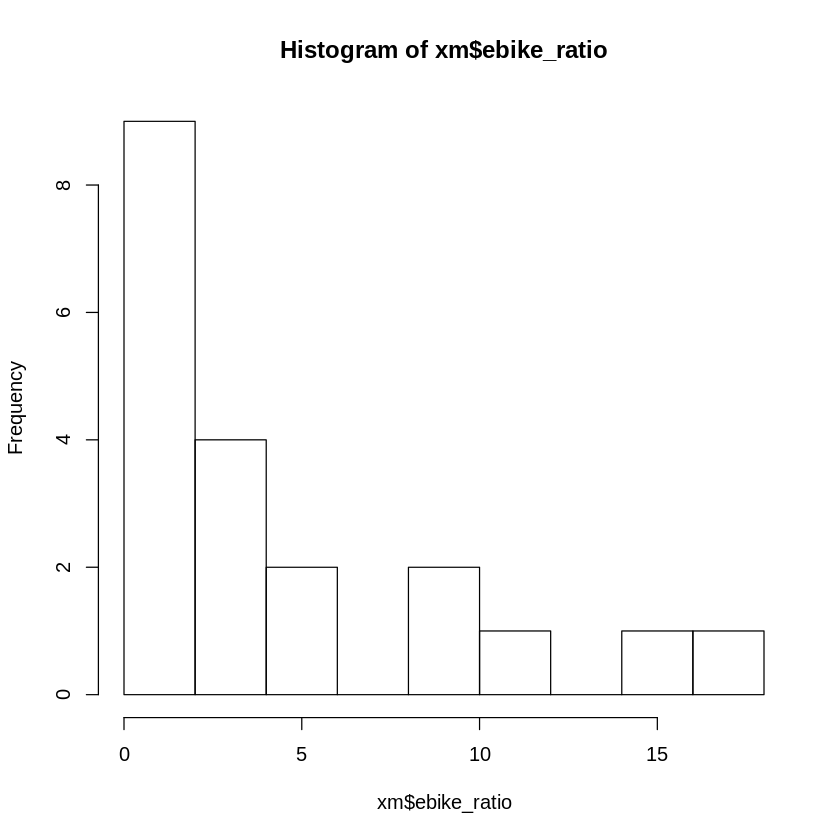

In [3]:
xm<-dat[,-1]
hist(xm$ebike_ratio)

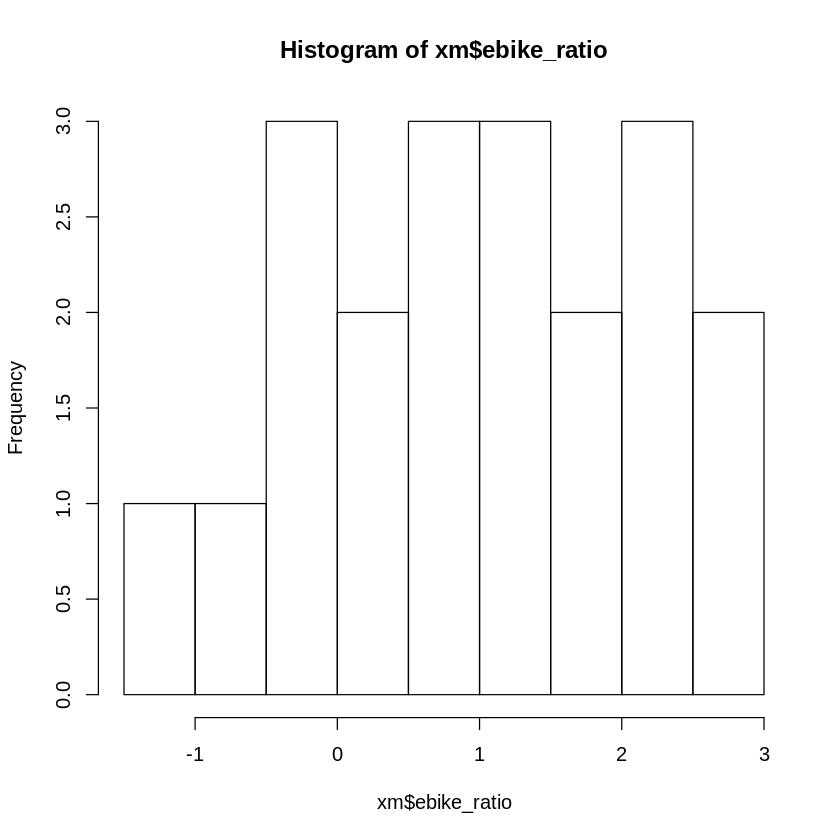

In [4]:
#The target variable is left skewed. As (linear) models love normally distributed data , we need to transform this variable and make it more normally distributed.
xm$ebike_ratio<-log(xm$ebike_ratio)
hist(xm$ebike_ratio)

corrplot 0.84 loaded


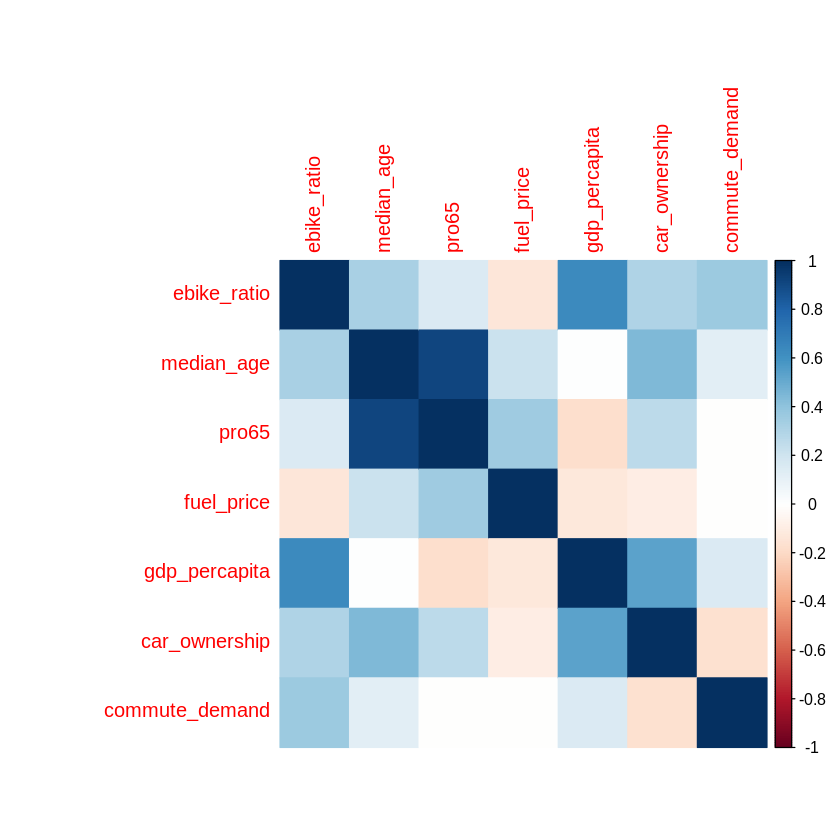

In [5]:
#corrlation heatmap

library(corrplot)
corrplot(cor(xm),method = "color")

In [6]:
#stepwise
library(MASS)
null<-lm(ebike_ratio~1,data = xm)
full<-lm(ebike_ratio~.,data = xm)
set.seed(123)
st <- stepAIC(null, scope=list(lower=null, upper=full), trace=FALSE)
coef(st)


(Intercept) gdp_percapita    median_age car_ownership 
-9.244211e+00  6.826082e-05  2.574978e-01 -5.804619e-03

In [4]:
#related variable:  gdp_percapita, median_age, pro65, car_ownership 

In [7]:
#Lasso
library(glmnet)
x<-as.matrix(xm[,-1])
y<-as.vector(xm[,1])
set.seed(1234)
tmp_las<-cv.glmnet(x=x,y=y,nfolds = 5,alpha=1,family='gaussian',intercept=TRUE)
coef(tmp_las, s=tmp_las$lambda.min)



Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-13



7 x 1 sparse Matrix of class "dgCMatrix"
                          1
(Intercept)    1.169556e-01
median_age     .           
pro65          .           
fuel_price     .           
gdp_percapita  2.274175e-05
car_ownership  .           
commute_demand .           

In [8]:
# just for comparision, can see that gdp_percapita is very likely to be relative.
# Now we start vairable coparsion

In [10]:
lm1<-lm(ebike_ratio~gdp_percapita,data = xm)
summary(lm1)


Call:
lm(formula = ebike_ratio ~ gdp_percapita, data = xm)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.52279 -0.65715 -0.05546  0.68927  1.60140 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)   -1.031e+00  6.127e-01  -1.683  0.10969   
gdp_percapita  5.316e-05  1.527e-05   3.482  0.00266 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9334 on 18 degrees of freedom
Multiple R-squared:  0.4025,	Adjusted R-squared:  0.3693 
F-statistic: 12.13 on 1 and 18 DF,  p-value: 0.002658


In [11]:
lm2<-lm(ebike_ratio~gdp_percapita+median_age+car_ownership ,data = xm)
summary(lm2)


Call:
lm(formula = ebike_ratio ~ gdp_percapita + median_age + car_ownership, 
    data = xm)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8337 -0.5049  0.2198  0.5345  1.2472 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)   -9.244e+00  3.802e+00  -2.432  0.02715 * 
gdp_percapita  6.826e-05  1.713e-05   3.985  0.00106 **
median_age     2.575e-01  1.056e-01   2.439  0.02678 * 
car_ownership -5.805e-03  3.894e-03  -1.491  0.15546   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.844 on 16 degrees of freedom
Multiple R-squared:  0.5658,	Adjusted R-squared:  0.4844 
F-statistic: 6.949 on 3 and 16 DF,  p-value: 0.003304


In [12]:
lm3<-lm(ebike_ratio~gdp_percapita+median_age+pro65+car_ownership ,data = xm)
summary(lm3)



Call:
lm(formula = ebike_ratio ~ gdp_percapita + median_age + pro65 + 
    car_ownership, data = xm)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8165 -0.6163  0.1317  0.5366  1.0852 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)   -1.271e+01  6.514e+00  -1.951  0.06993 . 
gdp_percapita  6.505e-05  1.810e-05   3.594  0.00266 **
median_age     4.120e-01  2.570e-01   1.603  0.12979   
pro65         -1.488e-01  2.248e-01  -0.662  0.51812   
car_ownership -6.210e-03  4.011e-03  -1.548  0.14237   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8592 on 15 degrees of freedom
Multiple R-squared:  0.5781,	Adjusted R-squared:  0.4656 
F-statistic: 5.138 on 4 and 15 DF,  p-value: 0.008247


In [15]:
lm4<-lm(ebike_ratio~gdp_percapita+median_age+commute_demand ,data = xm)
summary(lm4)



Call:
lm(formula = ebike_ratio ~ gdp_percapita + median_age + commute_demand, 
    data = xm)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5475 -0.6452  0.0062  0.7413  0.9533 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)   
(Intercept)    -7.704e+00  3.781e+00  -2.037  0.05851 . 
gdp_percapita   5.001e-05  1.406e-05   3.557  0.00263 **
median_age      1.594e-01  9.148e-02   1.742  0.10061   
commute_demand  1.773e-02  1.251e-02   1.418  0.17545   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.849 on 16 degrees of freedom
Multiple R-squared:  0.5607,	Adjusted R-squared:  0.4783 
F-statistic: 6.806 on 3 and 16 DF,  p-value: 0.003616


In [16]:

lm5<-lm(ebike_ratio~gdp_percapita+median_age+commute_demand+car_ownership ,data = xm)
summary(lm5)


Call:
lm(formula = ebike_ratio ~ gdp_percapita + median_age + commute_demand + 
    car_ownership, data = xm)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6733 -0.5694  0.1203  0.6191  1.0047 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)   
(Intercept)    -8.606e+00  3.900e+00  -2.207  0.04335 * 
gdp_percapita   6.197e-05  1.871e-05   3.313  0.00473 **
median_age      2.239e-01  1.132e-01   1.979  0.06651 . 
commute_demand  1.204e-02  1.383e-02   0.871  0.39757   
car_ownership  -4.208e-03  4.331e-03  -0.972  0.34658   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8505 on 15 degrees of freedom
Multiple R-squared:  0.5867,	Adjusted R-squared:  0.4765 
F-statistic: 5.323 on 4 and 15 DF,  p-value: 0.007155


In [17]:
lm6<-lm(ebike_ratio~gdp_percapita+pro65+car_ownership ,data = xm)
summary(lm6)


Call:
lm(formula = ebike_ratio ~ gdp_percapita + pro65 + car_ownership, 
    data = xm)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.76653 -0.49555  0.07424  0.59348  1.53012 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)   -2.685e+00  1.906e+00  -1.409  0.17796   
gdp_percapita  6.852e-05  1.883e-05   3.639  0.00221 **
pro65          1.785e-01  9.851e-02   1.812  0.08877 . 
car_ownership -3.937e-03  3.932e-03  -1.001  0.33159   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9004 on 16 degrees of freedom
Multiple R-squared:  0.5058,	Adjusted R-squared:  0.4132 
F-statistic: 5.459 on 3 and 16 DF,  p-value: 0.008884


In [ ]:
# The conclusiong is that gdp_percapita, median_age are relative, while car_ownership maybe relative